# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key


# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
cities[:10]

['harper',
 'homer',
 'lavrentiya',
 'maragogi',
 'ushuaia',
 'vostok',
 'punta arenas',
 'rudsar',
 'rikitea',
 'grants']

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [ ]:
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "sauda"
query_url = url + "appid=" + weather_api_key + "&q=" + city
response = requests.get(query_url).json()
response

In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# set up lists to hold reponse info
lat = []
temp = []
long = []
cloudiness=[]
humidity = []
windspeed = []
country=[]
date=[]
city_names=[]


# Loop through the list of cities and perform a request for data on each
for city in cities:
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        temp.append(response['main']['temp_max'])
        long.append(response['coord']['lon'])
        cloudiness.append(response['clouds']['all'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        city_names.append(city)
        print (city)
        
    except:
        print("City Not Found")

# print(f"The latitude information received is: {lat}")
# print(f"The temperature information received is: {temp}")

City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not Found
City Not F

bom jesus
kaeo
touros
phan thiet
siderno
paita
bara
tezpur
raudeberg
bani
port lincoln
owase
mandalgovi
payo
ust-omchug
slave lake
mitsamiouli
dordrecht
auki
epanomi
waukegan
lodwar
kouroussa
port shepstone
duleek
amboasary
crestview
kovylkino
bafq
totness
itarema
kahului
ashington
furano
namibe
boddam
calama
zuwarah
oktyabrskoye
polson
say
ormara
cariamanga
linfen
nhulunbuy
dubbo
gillette
laranjal paulista
asau
City Not Found
smolensk
puri
pandan niog


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [32]:
city_df=pd.DataFrame({"City":city_names,"Lat":lat, "Lng":long,
                      "Max Temp":temp, "Humidity":humidity,
                      "Cloudiness":cloudiness,"Wind Speed":windspeed,
                      "Country":country,
                     "Date":date})
city_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kasama,-10.21,31.18,18.10,95,71,1.87,ZM,1607103773
1,meulaboh,4.14,96.13,25.28,87,100,2.18,ID,1607103773
2,pozoblanco,38.38,-4.85,9.00,76,20,3.60,ES,1607103774
3,taltal,-25.40,-70.48,19.06,58,23,3.31,CL,1607103774
4,pella,59.78,30.82,0.00,94,90,5.00,RU,1607103774


In [8]:
# Export the data to csv
city_df.to_csv(r'../output_data/weather_data.csv')

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [9]:
# Display a statistical overview of the DataFrame.
city_df.describe()
#there is no value greater than 100. Max value is 100 


,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,61.000000,61.000000,61.000000,61.000000,61.000000,61.000000,6.100000e+01
mean,17.750820,23.926066,15.090328,68.459016,40.786885,3.624918,1.607104e+09
std,29.603392,81.325210,13.242712,22.839712,37.009960,2.611593,5.959969e+01
min,-38.600000,-156.470000,-21.680000,17.000000,0.000000,0.330000,1.607104e+09
25%,-5.200000,-39.920000,6.110000,55.000000,2.000000,1.500000,1.607104e+09
50%,20.890000,26.400000,17.730000,77.000000,26.000000,3.200000,1.607104e+09
75%,43.060000,92.800000,25.620000,87.000000,75.000000,4.780000,1.607104e+09
max,61.990000,173.780000,36.090000,100.000000,100.000000,10.300000,1.607104e+09


In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [ ]:
# Extract relevant fields from the data frame


# Export the City_Data into a csv


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

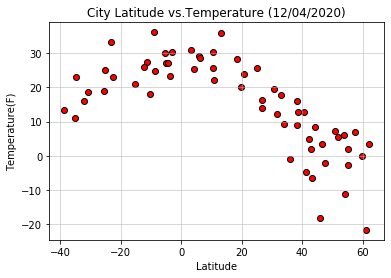

In [11]:
plt.scatter(city_df['Lat'],city_df['Max Temp'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs.Temperature ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Temperature(F)")
plt.grid(linestyle='-', linewidth=1,alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Temperature.png")

plt.show()

## Latitude vs. Humidity Plot

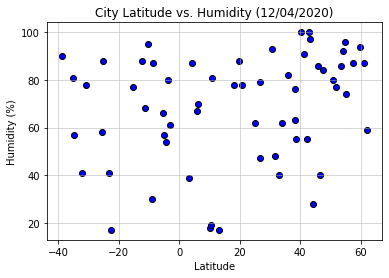

In [13]:
# Latitude vs. Humidity Scatter Plot 
plt.scatter(city_df["Lat"],city_df["Humidity"],facecolors = "blue", edgecolors ="black",marker ="o")
plt.title(f'City Latitude vs. Humidity ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Humidity.png")

plt.show()

## Latitude vs. Cloudiness Plot

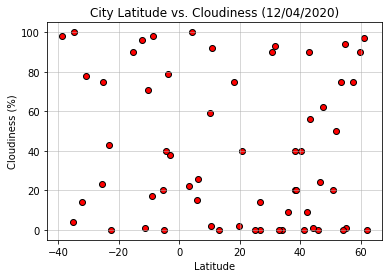

In [27]:
# Latitude vs. Cloudiness Scatter Plot
plt.scatter(city_df['Lat'],city_df['Cloudiness'],facecolors = "red", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Cloudiness ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_Cloudiness.png")

plt.show()

## Latitude vs. Wind Speed Plot

In [29]:
city_df["Wind Speed"]

KeyError: 'Wind Speed'

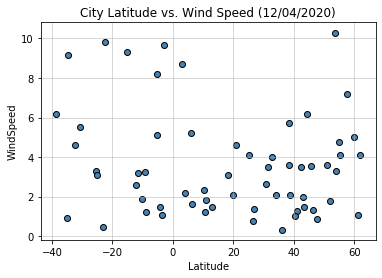

In [35]:
# Latitude vs. Wind Speed Scatter Plot 
plt.scatter(city_df["Lat"],city_df["Wind Speed"],facecolors = "steelblue", edgecolors ="black", marker ="o")
plt.title(f'City Latitude vs. Wind Speed ({time.strftime("%m/%d/%Y")})')
plt.xlabel("Latitude")
plt.ylabel("WindSpeed")
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# Save Figure
plt.savefig("../output_data/City_Latitude_vs_WindSpeed.png")

plt.show()

## Linear Regression

In [ ]:
# OPTIONAL: Create a function to create Linear Regression plots

In [ ]:
# Create Northern and Southern Hemisphere DataFrames

In [36]:
#northern Hemisphere Data frame 
N_df=city_df[city_df['Lat']>=0]
N_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,meulaboh,4.14,96.13,25.28,87,100,2.18,ID,1607103773
2,pozoblanco,38.38,-4.85,9.00,76,20,3.60,ES,1607103774
4,pella,59.78,30.82,0.00,94,90,5.00,RU,1607103774
5,indian head,38.60,-77.16,12.78,55,20,2.10,US,1607103774
7,gazojak,41.19,61.40,-4.69,91,0,1.26,TM,1607103775
8,tahta,26.77,31.50,14.01,47,0,1.38,EG,1607103775
12,phan thiet,10.93,108.10,22.19,81,92,1.85,VN,1607103775
13,siderno,38.28,16.30,16.00,63,40,5.70,IT,1607103775
15,bara,10.37,10.73,25.62,18,59,2.33,NG,1607103775
16,tezpur,26.63,92.80,16.32,79,14,0.79,IN,1607103736


In [37]:
#Southern Hemisphere Data frame 
S_df=city_df[city_df['Lat']<0]
S_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kasama,-10.21,31.18,18.10,95,71,1.87,ZM,1607103773
3,taltal,-25.40,-70.48,19.06,58,23,3.31,CL,1607103774
6,wonthaggi,-38.60,145.59,13.33,90,98,6.19,AU,1607103774
9,bom jesus,-9.07,-44.36,36.09,30,17,3.26,BR,1607103775
10,kaeo,-35.10,173.78,11.09,81,4,0.90,NZ,1607103775
11,touros,-5.20,-35.46,30.00,66,20,8.20,BR,1607103775
14,paita,-5.09,-81.11,27.00,57,0,5.10,PE,1607103775
19,port lincoln,-34.73,135.87,23.08,57,100,9.17,AU,1607103776
22,payo,-3.75,103.64,23.26,80,79,1.06,ID,1607103776
25,mitsamiouli,-11.38,43.28,27.46,68,1,3.20,KM,1607103776


In [38]:
# Print out the r-squared value along with the plot.
def linearplt(x_values,y_values,ytitle,coordinates):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,coordinates,fontsize=15,color="red")
    plt.xlabel("Latitude")
    plt.ylabel(ytitle)
    print(f"The r-squared is: {rvalue**2}")
    plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7130671292801758


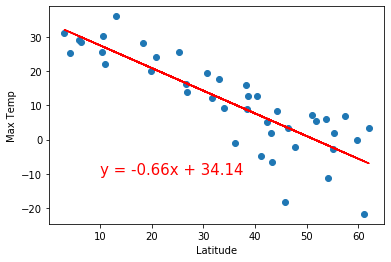

In [41]:
x_values=N_df['Lat']
y_values=N_df['Max Temp']
linearplt(x_values,y_values,"Max Temp",(10,-10))

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression